# INFO4301 - Projet - Codon Usage - Alex Savoie (A00188646)

## Introduction
### Description de la base de donnée
Notre dataset contient un total de 13025 différentes espèces vivants où chacun d'entre eux sont associés par un SpeciesID unique. Le paramètre Ncodons représente le nombre total de codon utilisé pour calculer la fréquence de chacun des codons. Chaque espèce est associé à l'un des 11 règnes (bactérie,plantes, mammifère, ect...). Cette base de donnée contient aussi la fréquence de chaque codon retrouvé à chez chaque espèce. La fréquence de chaque codon est exprimée en terme de pourcentage et varie dans l'intervalle [0,1[. La base de donnée contient les 64 codons possible (colonne 6 à 69).
### Objectif
Dans ce projet, l'objectif sera de trouver un modèle qui sera en mesure de classifier les différents règnes en fonction de la fréquence de leurs codons. Donc, nos caractéristiques seront les 64 différents codons et notre target sera les différents règnes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')  #Ignore les warnings qui nous indique que nous avons pas encore convergé

df = pd.read_csv("codon_usage.csv")
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

#### La caractéristique UUU et UUC sont de type 'object' alors qu'il devrait être de type 'float64'. Il semble avoir un problème dans notre dataset...

En regardant le fichier codon_usage.csv, on s'appercoit que deux de nos données contiennent une erreur. On supprime manuellement ces données qui nous cause du trouble. On convertie par la suite le data type de 'UUC' et 'UUU' à un float64.

In [4]:
i = df[((df.SpeciesID == 12440) | (df.SpeciesID == 353569))].index

df.drop(i, inplace=True)

df['UUU'] = df['UUU'].astype('float64')
df['UUC'] = df['UUC'].astype('float64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   SpeciesID    13026 non-null  int64  
 3   Ncodons      13026 non-null  int64  
 4   SpeciesName  13026 non-null  object 
 5   UUU          13026 non-null  float64
 6   UUC          13026 non-null  float64
 7   UUA          13026 non-null  float64
 8   UUG          13026 non-null  float64
 9   CUU          13026 non-null  float64
 10  CUC          13026 non-null  float64
 11  CUA          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  AUU          13026 non-null  float64
 14  AUC          13026 non-null  float64
 15  AUA          13026 non-null  float64
 16  AUG          13026 non-null  float64
 17  GUU          13026 non-null  float64
 18  GUC          13026 non-null  float64
 19  GUA 

### Visualisation de la répartition des règnes

<AxesSubplot:xlabel='Kingdom', ylabel='count'>

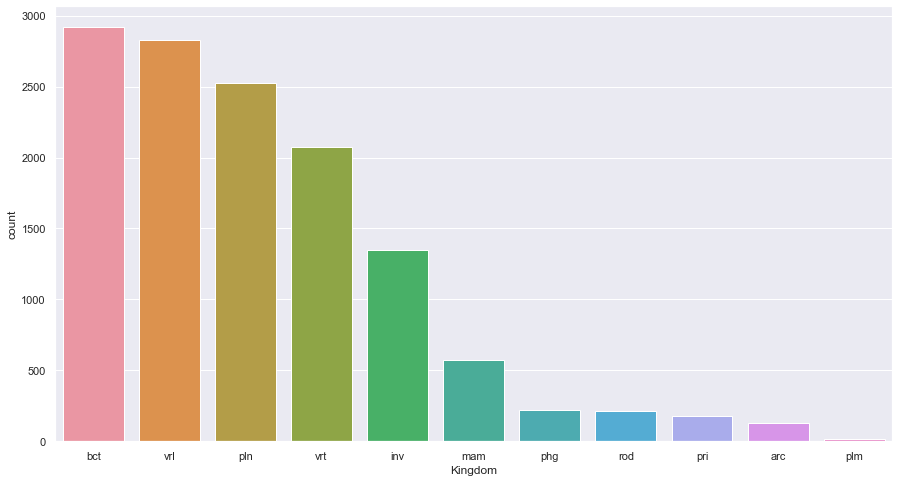

In [5]:
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,8))
sns.countplot(x="Kingdom", data=df, order = df['Kingdom'].value_counts().index)

Ce graphe démontre le déséquilibre de la répartition de nos classes. En d'autre mots, notre dataset ne contient pas un nombre égal de données pour chaque classe. Par exemple, si l'on regarde les deux extrêmes ,la classe bactérie compte beaucoup plus de données que la classe plm. Cela pourra jouer un rôle important plus tard au niveau de la classification.

### Visualisation des données 

Par exemple, regardons le comportement des différents règnes pour trois codons quelconques.

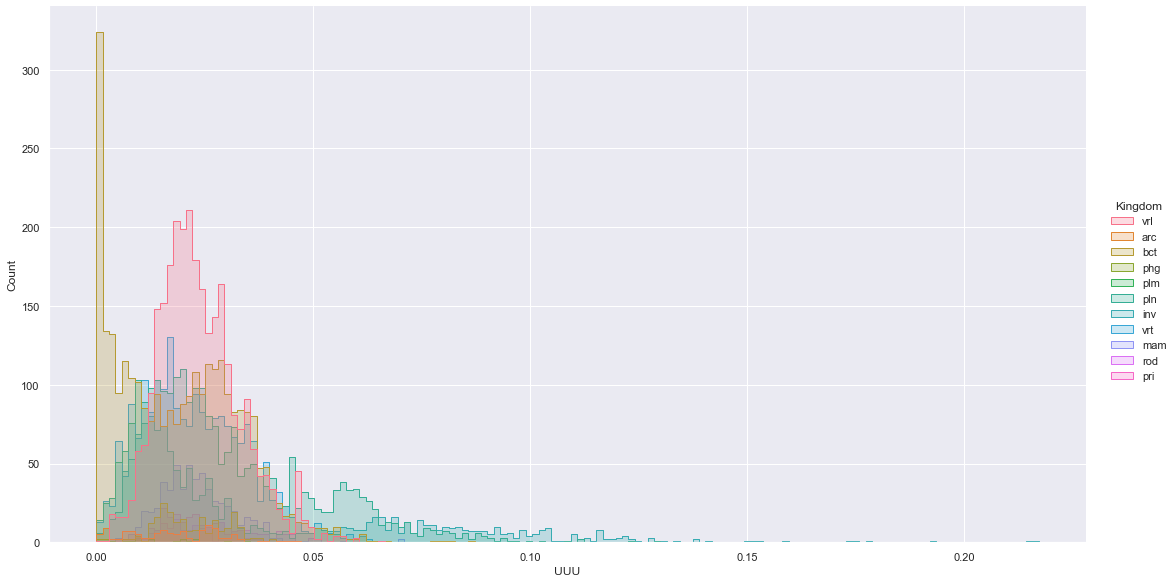

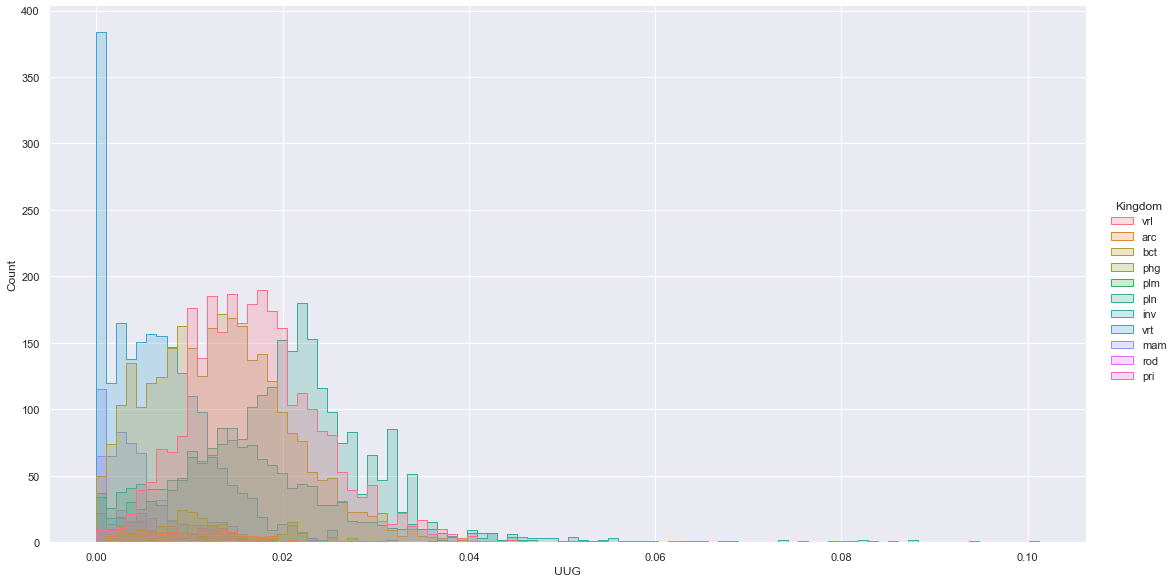

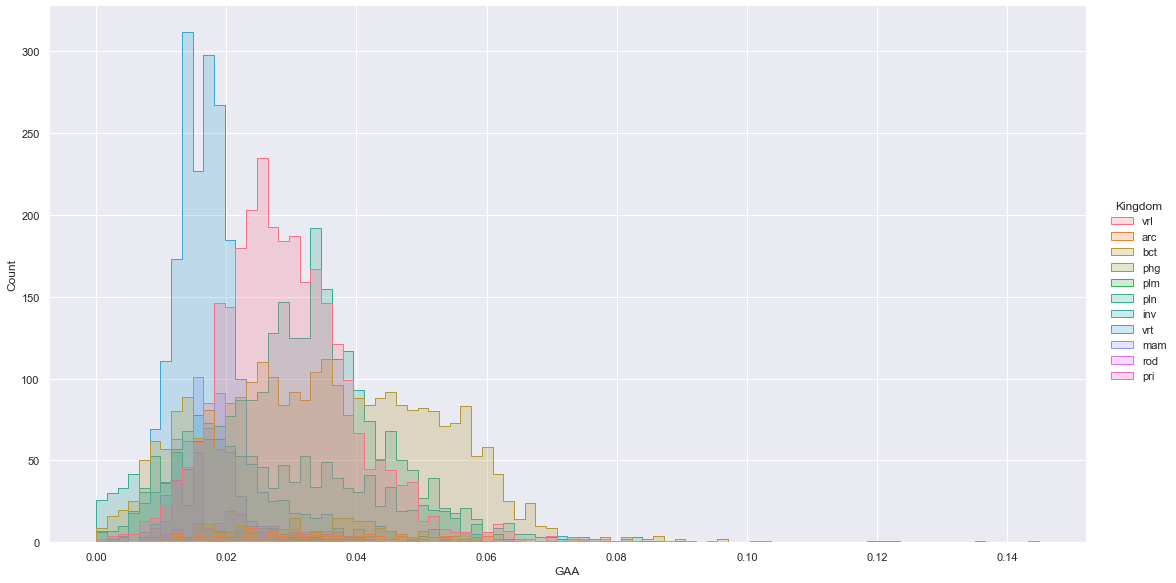

In [6]:
import seaborn as sns
cdon = ['UUU', 'UUG', 'GAA']
for i in cdon:
    sns.displot(df, x=i, hue="Kingdom" , element="step", height=8.27, aspect=15/8)

### Observations

Dans le cas du codon UUU, les bactéries semble en majorité contenir un très faible poucentage de codon UUU. Même une grande quantité d'entre eux semble ne contenir pratiquement un pourcentage près de 0. Pour ce qui est des virus, ceux-ci suivent un distribution ressemblant à la forme d'une cloche entre 0 et 0,05. Donc, on remarque que la fréquence des codons semblent être un bon moyen de différencier les différents règnes. En d'autres mots, la fréquence des codons ne semble pas être distribuer de facon aléatoire.

### Division des caractéristiques et target
Puisque qu'elles n'ont aucune utilité pour atteindre notre but pour ce projet, les colonnes 'DNAtype', 'SpeciesID', 'Ncodons' et 'SpeciesName' sont tous simplement ignorées. Nous utiliserons seulement les 64 différents codons pour nos caractéristiques

In [7]:
y = df.iloc[:, 0]
X = df.iloc [:, 5:]

### Train/Test split
Puisque notre dataset contient une assez grande quantité de données, nos données seront divisé en sorte que 80% seront utilisées pour le training et 20% pour les tests

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10420, 64) (2606, 64) (10420,) (2606,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Regression Logistique

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

ite = [];

for x in range(21):
        ite.append(x)

for i in ite:
        lr = LogisticRegression(solver='newton-cg', max_iter = i)
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        score = metrics.accuracy_score(y_test, pred)
        if (i%5 == 0):
                print('\t\tIteration:' , i , '\t\tAccuracy:' , score)

		Iteration: 0 		Accuracy: 0.011128165771297006
		Iteration: 5 		Accuracy: 0.8349961627014582
		Iteration: 10 		Accuracy: 0.8580199539524175
		Iteration: 15 		Accuracy: 0.8591711435149655
		Iteration: 20 		Accuracy: 0.8599386032233308


Avec le solver de type newton-cg, la convergeance semble s'effectuer dans les environs de 10 itérations.

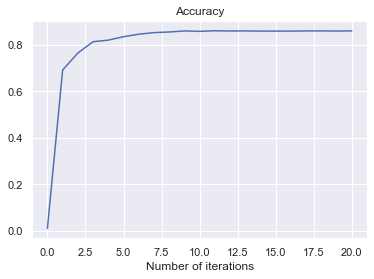

In [10]:
acc = []


for x in ite:
    lr = LogisticRegression(solver='newton-cg', max_iter = x)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    acc.append(score)

plt.plot(ite, acc)
plt.grid(True)
plt.title('Accuracy')
plt.xlabel('Number of iterations')
plt.show()


In [11]:
from sklearn.metrics import classification_report

Accuracy =  0.8599386032233308


<AxesSubplot:>

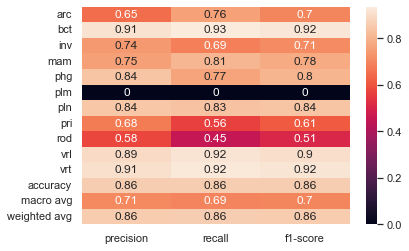

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


Difficulté à prédire certains règnes mais les prédictions sont correctes pour les règnes ayant beaucoup de données comme bct et vrl. Regardons s'il existe un algorithme plus performant.

## Random Forest

Accuracy =  0.8921719109746739


<AxesSubplot:>

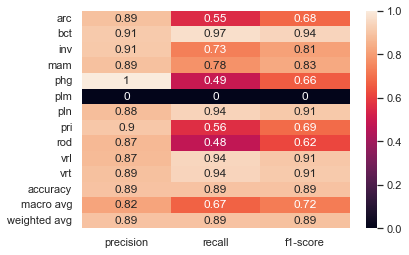

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)



## SVM (Support Vector Machine)

Accuracy =  0.9336147352264006


<AxesSubplot:>

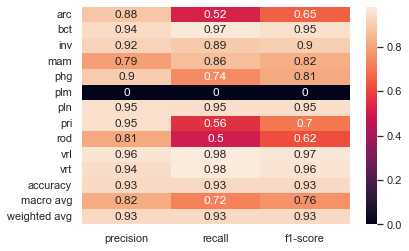

In [14]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)
pred = sv.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


## Neural Network

Accuracy =  0.9282425172678435


<AxesSubplot:>

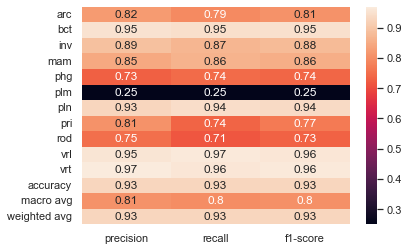

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

## KNN (k-nearest neighbor)

Accuracy =  0.9190330007674598


<AxesSubplot:>

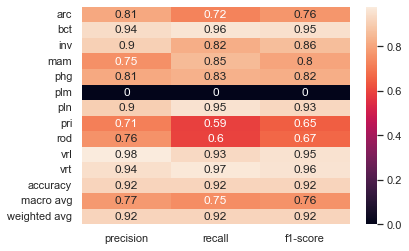

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
pred = kn.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

## Tuning des hyperparamètres

### SVC

In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'),
                'gamma':('scale', 'auto'),
                'class_weight' : (None, 'balanced'),
                'C': [0.1, 1, 10]
                }

sv2 = GridSearchCV(SVC(), parameters, refit=True, cv=5, verbose=3)
sv2.fit(X_train, y_train)

print(sv2.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.874 total time=   1.5s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.864 total time=   1.5s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.869 total time=   1.5s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.872 total time=   1.5s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.875 total time=   1.5s
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.851 total time=   4.2s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.841 total time=   4.2s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.847 total time=   4.2s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.852 total time=   4.3s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=

Accuracy =  0.9478127398311589


<AxesSubplot:>

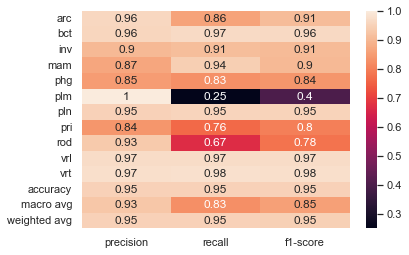

In [19]:
pred = sv2.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### Neural Network

In [22]:
parameters = {'hidden_layer_sizes':[30, 50, 100, 200],
                'learning_rate_init': [0.0001, 0.001, 0.01],
                'alpha' : [0.0001, 0.001, 0.01],
                }

mlp2 = GridSearchCV(MLPClassifier(), parameters, refit=True, cv=5, verbose=3)
mlp2.fit(X_train, y_train)

print(mlp2.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.0001;, score=0.871 total time=   8.0s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.0001;, score=0.883 total time=   8.0s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.0001;, score=0.877 total time=   8.3s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.0001;, score=0.893 total time=   8.6s
[CV 5/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.0001;, score=0.874 total time=   8.4s
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.909 total time=   8.4s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.916 total time=   8.1s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=0.001;, score=0.909 total time=   8.1s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=30, learning_rate_init=

Référence pour aider à determiner les hyperparamètres les plus importants à modifier pour un réseau neurone: https://arxiv.org/abs/2003.05689 Hyperparameter tuning Neural Network

Accuracy =  0.9435917114351496


<AxesSubplot:>

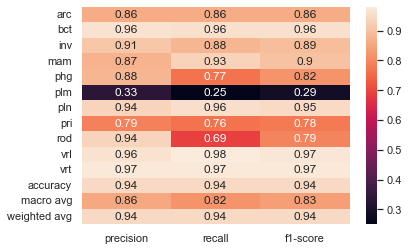

In [24]:
pred = mlp2.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### KNN

In [ ]:

parameters = {'n_neighbors': [2, 3, 5 , 10],
                'p': [1, 2],    # 1=Manhattan distance & 2=Euclidean distance
                'weights' : ('uniform', 'distance'),
                }

knn2 = GridSearchCV(SVC(), parameters, refit=True, cv=5, verbose=3)
knn2.fit(X_train, y_train)

print(knn2.best_params_)

In [ ]:
pred = knn2.predict(X_test)


print('Accuracy = ', accuracy_score(y_test, pred))

clf_report = classification_report(y_test,pred, output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)